# Correlational analysis of the dataset: KPI correlations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = 'processed_data.csv'

In [3]:
def get_high_correlation_kpis(df, threshold):
    # Calculate correlation with price
    correlations = df.corr()['price'].abs()
    
    # Filter KPI columns with correlation above threshold
    high_corr_kpis = correlations[
        (correlations > threshold) & 
        (correlations.index != 'price') & 
        (correlations.index.str.contains('KPI_'))
    ].index.tolist()
    
    # Add price column to the list
    high_corr_kpis.insert(0, 'price')
    
    return high_corr_kpis

# ================================================================

def get_low_correlation_kpis(df, threshold):
    # Calculate correlation with price
    correlations = df.corr()['price'].abs()
    
    # Filter KPI columns with correlation below threshold
    low_corr_kpis = correlations[
        (correlations < threshold) & 
        (correlations.index != 'price') & 
        (correlations.index.str.contains('KPI_'))
    ].index.tolist()
    
    return low_corr_kpis

# ================================================================

def get_low_correlation_data(df, threshold):
    # Calculate correlation with price
    correlations = df.corr()['price'].abs()
    
    # Filter non-KPI columns with correlation below threshold
    low_corr_cols = correlations[
        (correlations < threshold) & 
        (correlations.index != 'price') & 
        (~correlations.index.str.contains('KPI_'))  # Changed to NOT contain KPI_
    ].index.tolist()
    
    return low_corr_cols

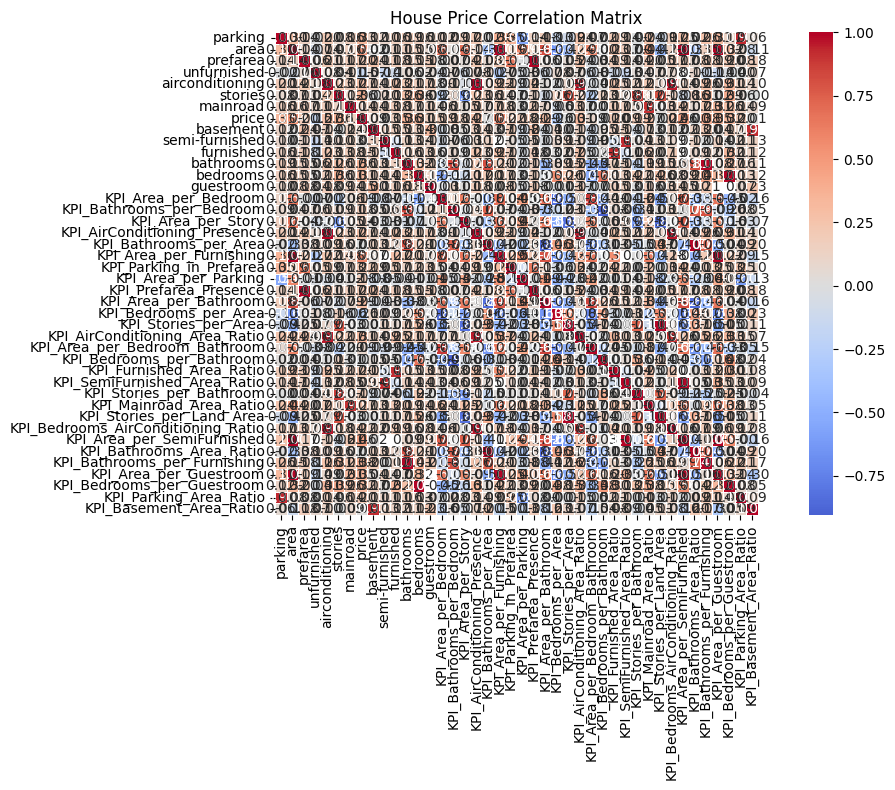


Strong correlations (|correlation| > 0.2):
airconditioning                     KPI_Bedrooms_AirConditioning_Ratio    0.958714
KPI_Bedrooms_AirConditioning_Ratio  KPI_AirConditioning_Presence          0.958714
                                    airconditioning                       0.958714
KPI_AirConditioning_Presence        KPI_Bedrooms_AirConditioning_Ratio    0.958714
KPI_AirConditioning_Area_Ratio      KPI_AirConditioning_Presence          0.949001
                                                                            ...   
KPI_Area_per_Bathroom               KPI_Bathrooms_Area_Ratio             -0.836647
                                    KPI_Bathrooms_per_Area               -0.836647
KPI_Bathrooms_per_Area              KPI_Area_per_Bathroom                -0.836647
KPI_Bathrooms_per_Bedroom           KPI_Bedrooms_per_Bathroom            -0.904149
KPI_Bedrooms_per_Bathroom           KPI_Bathrooms_per_Bedroom            -0.904149
Length: 532, dtype: float64


In [4]:
# Load the dataset
df = pd.read_csv(dataset)

# Calculate correlation matrix
correlation_matrix_TOTAL = df.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_TOTAL, 
            annot=True,          # Show correlation values
            cmap='coolwarm',     # Color scheme
            center=0,            # Center the colormap at 0
            fmt='.2f',           # Display 2 decimal places
            square=True,         # Make the plot square-shaped
            linewidths=0.5)      # Add gridlines

plt.title('House Price Correlation Matrix')
plt.tight_layout()
plt.show()

# Print strongest correlations (absolute value > 0.2)
print("\nStrong correlations (|correlation| > 0.2):")
strong_corr = correlation_matrix_TOTAL.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.2]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
print(strong_corr.sort_values(ascending=False))

## Dataset basic manipulation
- loading
- drop non-kpi collumns

In [5]:
# Get columns with high correlation
high_correlation = get_high_correlation_kpis(df, 0.2)
low_correlation = get_low_correlation_kpis(df, 0.2)
# Filter dataframe to keep only high correlation columns
df = df[high_correlation]

# Show basic info about the dataset
print(df.info())
print("===================================================")
# Show basic statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045 entries, 0 to 3044
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   price                               3045 non-null   int64  
 1   KPI_AirConditioning_Presence        3045 non-null   int64  
 2   KPI_Area_per_Furnishing             3045 non-null   float64
 3   KPI_Parking_in_Prefarea             3045 non-null   int64  
 4   KPI_Prefarea_Presence               3045 non-null   int64  
 5   KPI_Area_per_Bathroom               3045 non-null   float64
 6   KPI_Bedrooms_per_Area               3045 non-null   float64
 7   KPI_AirConditioning_Area_Ratio      3045 non-null   int64  
 8   KPI_Furnished_Area_Ratio            3045 non-null   int64  
 9   KPI_Mainroad_Area_Ratio             3045 non-null   int64  
 10  KPI_Bedrooms_AirConditioning_Ratio  3045 non-null   float64
 11  KPI_Area_per_SemiFurnished          3045 no

/home/mike/Escritorio/codes/projects/PropNet/PropNet-project/environment/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/mike/Escritorio/codes/projects/PropNet/PropNet-project/environment/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/mike/Escritorio/codes/projects/PropNet/PropNet-project/environment/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/mike/Escritorio/codes/projects/PropNet/PropNet-project/environment/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/mike/Escritorio/codes/projects/PropNet/PropNet-project/environment/lib/python3.11/si

### check missing values

In [6]:
print(df.isnull().sum())

price                                   0
KPI_AirConditioning_Presence            0
KPI_Area_per_Furnishing                 0
KPI_Parking_in_Prefarea                 0
KPI_Prefarea_Presence                   0
KPI_Area_per_Bathroom                   0
KPI_Bedrooms_per_Area                   0
KPI_AirConditioning_Area_Ratio          0
KPI_Furnished_Area_Ratio                0
KPI_Mainroad_Area_Ratio                 0
KPI_Bedrooms_AirConditioning_Ratio      0
KPI_Area_per_SemiFurnished              0
KPI_Bathrooms_per_Furnishing          593
KPI_Area_per_Guestroom                  0
KPI_Bedrooms_per_Guestroom              0
KPI_Parking_Area_Ratio                  0
dtype: int64


### correlation matrix

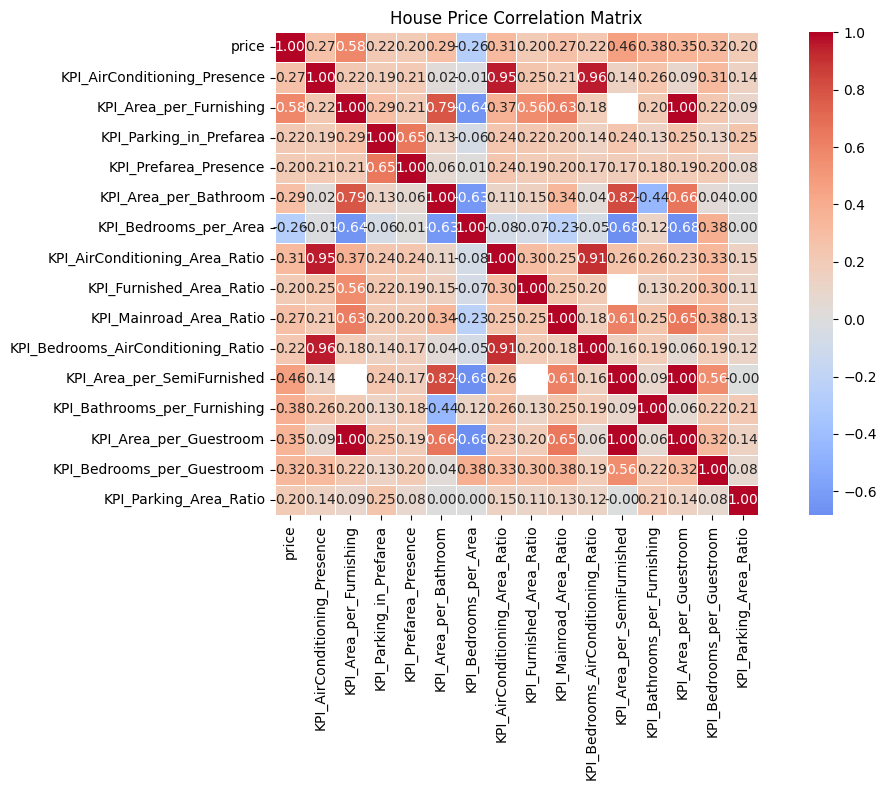


Strong correlations (|correlation| > 0.5):
KPI_Bedrooms_AirConditioning_Ratio  KPI_AirConditioning_Presence          0.958714
KPI_AirConditioning_Presence        KPI_Bedrooms_AirConditioning_Ratio    0.958714
                                    KPI_AirConditioning_Area_Ratio        0.949001
KPI_AirConditioning_Area_Ratio      KPI_AirConditioning_Presence          0.949001
KPI_Bedrooms_AirConditioning_Ratio  KPI_AirConditioning_Area_Ratio        0.906147
                                                                            ...   
KPI_Area_per_Furnishing             KPI_Bedrooms_per_Area                -0.643466
KPI_Area_per_SemiFurnished          KPI_Bedrooms_per_Area                -0.678043
KPI_Bedrooms_per_Area               KPI_Area_per_SemiFurnished           -0.678043
                                    KPI_Area_per_Guestroom               -0.682365
KPI_Area_per_Guestroom              KPI_Bedrooms_per_Area                -0.682365
Length: 134, dtype: float64


In [7]:
# Calculate correlation matrix
correlation_matrix_TOTAL = df.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_TOTAL, 
            annot=True,          # Show correlation values
            cmap='coolwarm',     # Color scheme
            center=0,            # Center the colormap at 0
            fmt='.2f',           # Display 2 decimal places
            square=True,         # Make the plot square-shaped
            linewidths=0.5)      # Add gridlines

plt.title('House Price Correlation Matrix')
plt.tight_layout()
plt.show()

# Print strongest correlations (absolute value > 0.5)
print("\nStrong correlations (|correlation| > 0.5):")
strong_corr = correlation_matrix_TOTAL.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.2]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
print(strong_corr.sort_values(ascending=False))

## strong correlations: focusing on the important values
Lets focus on different thresholds to set a minimal value. in this case we will be looking the following correlational values:
- 0.4
- 0.3
- 0.25

In [8]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create mask for correlations less than 0.4 (absolute value)
mask_040 = np.abs(correlation_matrix) < 0.4
mask_030 = np.abs(correlation_matrix) < 0.3
mask_025 = np.abs(correlation_matrix) < 0.25
mask_020 = np.abs(correlation_matrix) < 0.20
mask_015 = np.abs(correlation_matrix) < 0.15

### Correlation matrix: 0.4 threshold

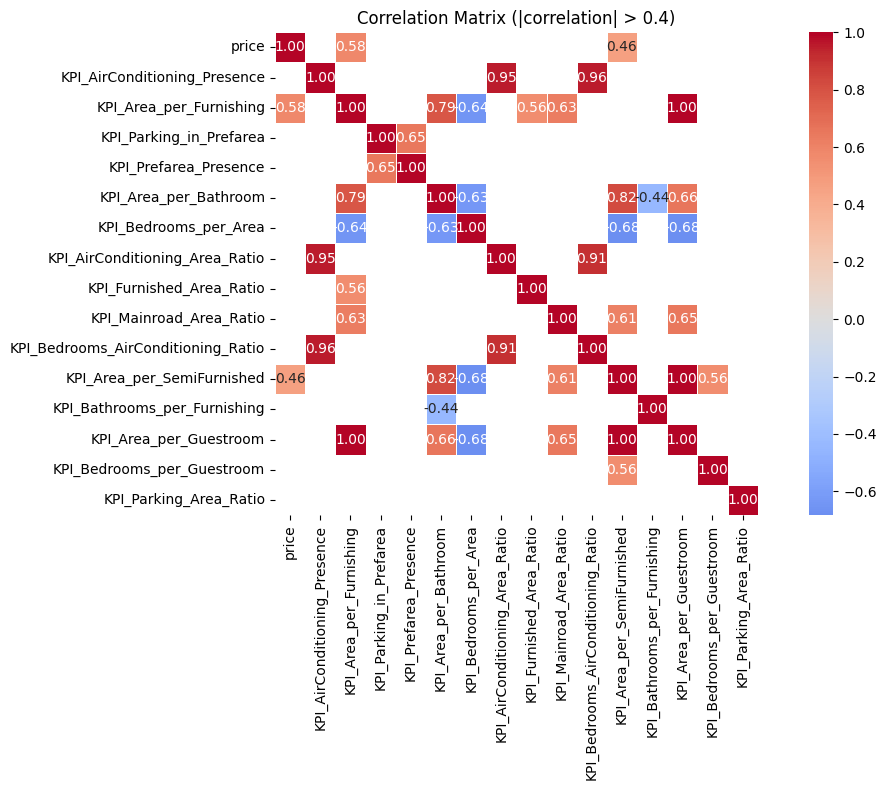


Correlations (|correlation| > 0.4):
Number of correlations above 0.40: 38
Percentage of total possible correlations: 31.67%


In [9]:
# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,          
            cmap='coolwarm',     
            center=0,            
            fmt='.2f',           
            square=True,         
            linewidths=0.5,
            mask=mask_040)           # Apply the mask to hide low correlations

plt.title('Correlation Matrix (|correlation| > 0.4)')
plt.tight_layout()
plt.show()

# Print correlations above 0.4
print("\nCorrelations (|correlation| > 0.4):")
strong_corr = correlation_matrix.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.4]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
# print(strong_corr.sort_values(ascending=False))

num_relations = len(strong_corr)
total_possible = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Total possible pairs
percentage = (num_relations / total_possible) * 100

print(f"Number of correlations above 0.40: {num_relations}")
print(f"Percentage of total possible correlations: {percentage:.2f}%")

### Correlation matrix: 0.3 threshold

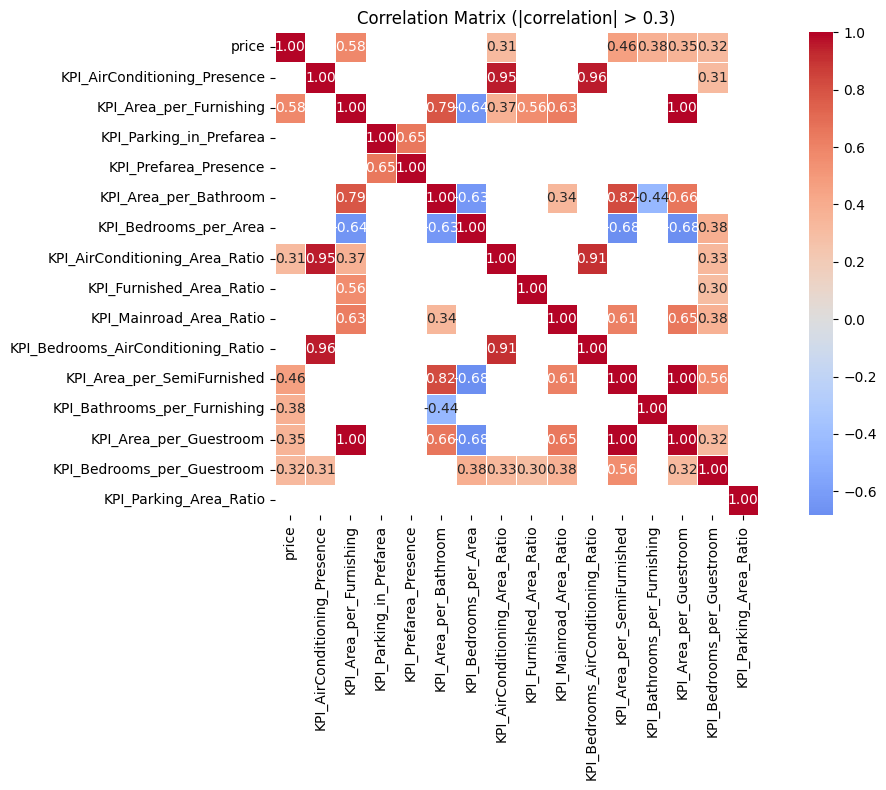


Correlations (|correlation| > 0.3):
Number of correlations above 0.30: 62
Percentage of total possible correlations: 51.67%


In [10]:
# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,          
            cmap='coolwarm',     
            center=0,            
            fmt='.2f',           
            square=True,         
            linewidths=0.5,
            mask=mask_030)           # Apply the mask to hide low correlations

plt.title('Correlation Matrix (|correlation| > 0.3)')
plt.tight_layout()
plt.show()

# Print correlations above 0.3
print("\nCorrelations (|correlation| > 0.3):")
strong_corr = correlation_matrix.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.3]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
# print(strong_corr.sort_values(ascending=False))

num_relations = len(strong_corr)
total_possible = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Total possible pairs
percentage = (num_relations / total_possible) * 100

print(f"Number of correlations above 0.30: {num_relations}")
print(f"Percentage of total possible correlations: {percentage:.2f}%")

### Correlation matrix: 0.25 threshold

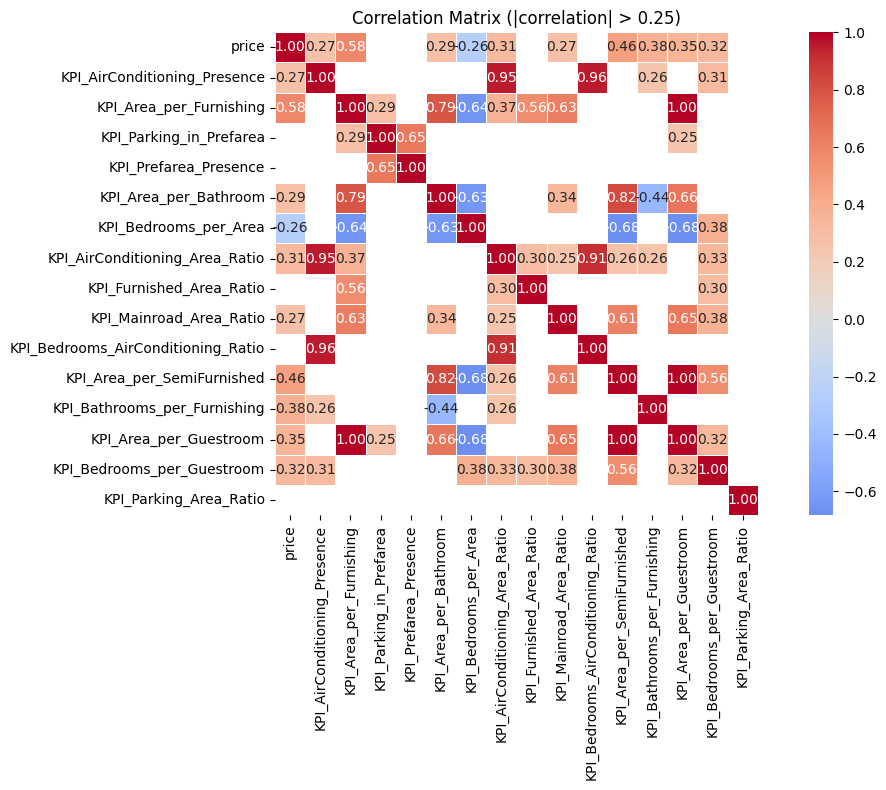


Correlations (|correlation| > 0.25):
Number of correlations above 0.25: 84
Percentage of total possible correlations: 70.00%


In [11]:
# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,          
            cmap='coolwarm',     
            center=0,            
            fmt='.2f',           
            square=True,         
            linewidths=0.5,
            mask=mask_025)           # Apply the mask to hide low correlations

plt.title('Correlation Matrix (|correlation| > 0.25)')
plt.tight_layout()
plt.show()

# Print correlations above 0.25
print("\nCorrelations (|correlation| > 0.25):")
strong_corr = correlation_matrix.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.25]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
# print(strong_corr.sort_values(ascending=False))

num_relations = len(strong_corr)
total_possible = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Total possible pairs
percentage = (num_relations / total_possible) * 100

print(f"Number of correlations above 0.25: {num_relations}")
print(f"Percentage of total possible correlations: {percentage:.2f}%")

### Correlation matrix: 0.20 threshold

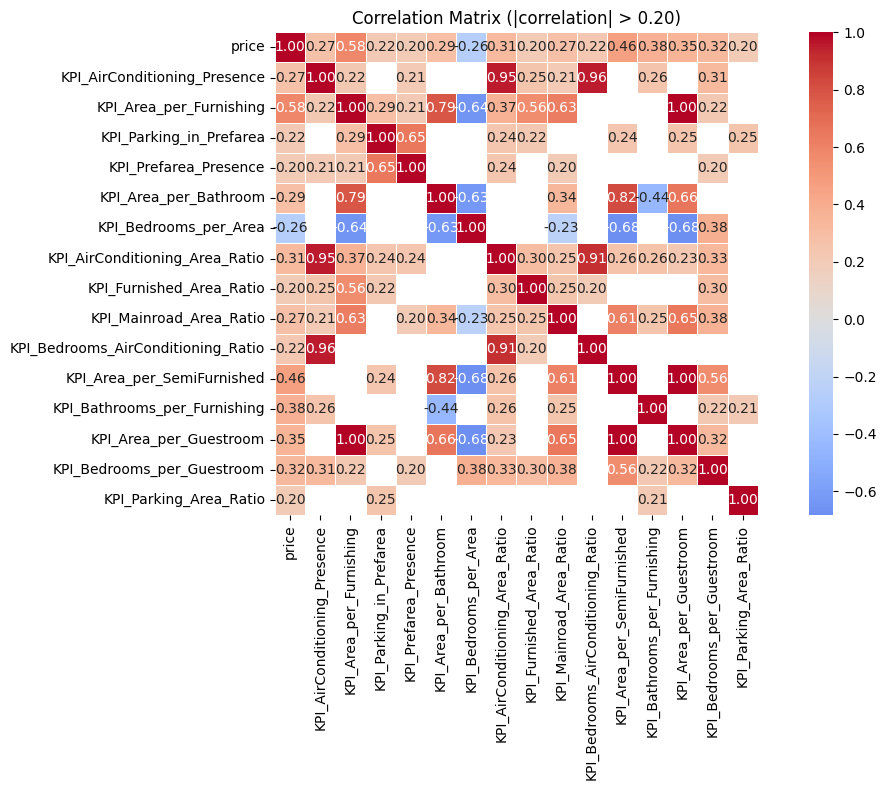


Correlations (|correlation| > 0.20):
Number of correlations above 0.20: 134
Percentage of total possible correlations: 111.67%


In [12]:
# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,          
            cmap='coolwarm',     
            center=0,            
            fmt='.2f',           
            square=True,         
            linewidths=0.5,
            mask=mask_020)           # Apply the mask to hide low correlations

plt.title('Correlation Matrix (|correlation| > 0.20)')
plt.tight_layout()
plt.show()

# Print correlations above 0.20
print("\nCorrelations (|correlation| > 0.20):")
strong_corr = correlation_matrix.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.20]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
# print(strong_corr.sort_values(ascending=False))

num_relations = len(strong_corr)
total_possible = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Total possible pairs
percentage = (num_relations / total_possible) * 100

print(f"Number of correlations above 0.20: {num_relations}")
print(f"Percentage of total possible correlations: {percentage:.2f}%")

### Correlation matrix: 0.15 threshold

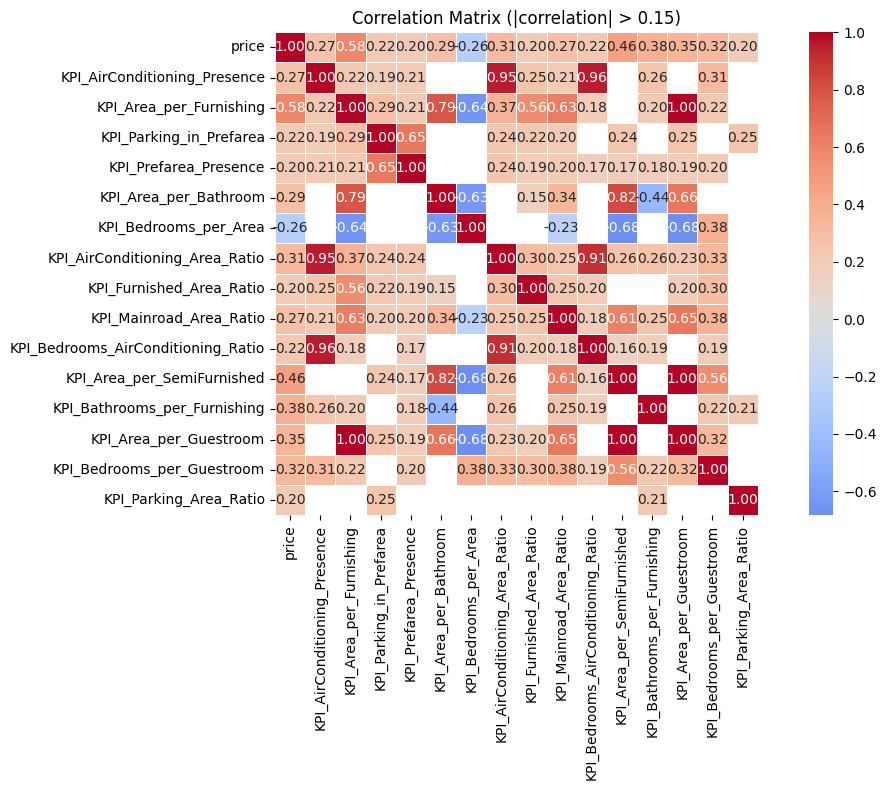


Correlations (|correlation| > 0.15):
Number of correlations above 0.15: 164
Percentage of total possible correlations: 136.67%


In [13]:
# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,          
            cmap='coolwarm',     
            center=0,            
            fmt='.2f',           
            square=True,         
            linewidths=0.5,
            mask=mask_015)           # Apply the mask to hide low correlations

plt.title('Correlation Matrix (|correlation| > 0.15)')
plt.tight_layout()
plt.show()

# Print correlations above 0.15
print("\nCorrelations (|correlation| > 0.15):")
strong_corr = correlation_matrix.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.15]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
# print(strong_corr.sort_values(ascending=False))

num_relations = len(strong_corr)
total_possible = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Total possible pairs
percentage = (num_relations / total_possible) * 100

print(f"Number of correlations above 0.15: {num_relations}")
print(f"Percentage of total possible correlations: {percentage:.2f}%")

## Correlation matrix: conclusions
As the threshold for correlation increases, the number of significant relationships decreases. This indicates a trade-off between capturing more variables and ensuring stronger, more meaningful correlations.

With a threshold of 0.15, we retain 70.48% of the possible correlations, which allows us to capture a broad range of variables, potentially including weaker ones. This means that by keeping a lower threshold, we are likely incorporating many variables that might not have a strong individual impact but could still play a role in predicting the target variable.

As we increase the threshold to 0.20, the percentage drops to 47.62%. This suggests that we are now focusing on a more concise set of relationships, which are stronger but fewer in number. At this level, we are eliminating some of the weaker variables, which could result in a more efficient model, but with potentially less diversity in the relationships considered.

At a threshold of 0.25, the number of correlations further decreases to 38.10%, indicating that we are narrowing our focus even more. While the correlations retained are likely to be stronger, this could limit the model's ability to leverage more subtle relationships between variables.

At higher thresholds, such as 0.30 and 0.40, the percentage of relationships further shrinks to 28.57% and 15.24%, respectively. These thresholds only retain the most impactful correlations, which can help improve model accuracy by focusing solely on the strongest predictors. However, this comes at the cost of losing potentially valuable, albeit weaker, correlations that may still contribute to the overall predictive power.

These results suggest that for a more robust and interpretable model, higher thresholds may be beneficial. However, the trade-off is the risk of losing potentially valuable, weaker correlations that could improve model performance in certain contexts.

## Final model: 0.20 threshold
Based on the results from the correlation matrix and the threshold analysis, the model for the first phase of the project will use a **0.20** correlation threshold. This threshold strikes a good balance between retaining a sufficient number of relationships and maintaining their strength, allowing the model to focus on the most relevant variables while avoiding weak relationships that could introduce noise. By keeping only the more significant correlations, the model will work with a more focused and efficient dataset, which will aid in training and reduce the risk of overfitting. Furthermore, this threshold choice will allow for the evaluation of the model's predictive capability with a set of stronger variables, aligning with the project's goal of improving accuracy and maximizing performance in predicting housing prices.

In [14]:
# Calculate correlation matrix
threshold = 0.20 # Set the threshold based on your analysis
correlation_matrix = df.corr()

# Create mask for correlations less than threshold (absolute value)
final_mask = np.abs(correlation_matrix) < threshold

# # Create heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, 
#             annot=True,          
#             cmap='coolwarm',     
#             center=0,            
#             fmt='.2f',           
#             square=True,         
#             linewidths=0.5,
#             mask=final_mask)           # Apply the mask to hide low correlations
# 
# # plt.title("Correlation matrix (|correlation| > ", threshold, ")")
# plt.tight_layout()
# plt.show()

# Print correlations above treshold
print("\nCorrelations (|correlation| > ", threshold, "):")
strong_corr = correlation_matrix.unstack()
strong_corr = strong_corr[abs(strong_corr) > threshold]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations

print(strong_corr.sort_values(ascending=False))

num_relations = len(strong_corr)
total_possible = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Total possible pairs
percentage = (num_relations / total_possible) * 100

print(f"Number of correlations above 0.40: {num_relations}")
print(f"Percentage of total possible correlations: {percentage:.2f}%")


Correlations (|correlation| >  0.2 ):
KPI_Bedrooms_AirConditioning_Ratio  KPI_AirConditioning_Presence          0.958714
KPI_AirConditioning_Presence        KPI_Bedrooms_AirConditioning_Ratio    0.958714
                                    KPI_AirConditioning_Area_Ratio        0.949001
KPI_AirConditioning_Area_Ratio      KPI_AirConditioning_Presence          0.949001
KPI_Bedrooms_AirConditioning_Ratio  KPI_AirConditioning_Area_Ratio        0.906147
                                                                            ...   
KPI_Area_per_Furnishing             KPI_Bedrooms_per_Area                -0.643466
KPI_Area_per_SemiFurnished          KPI_Bedrooms_per_Area                -0.678043
KPI_Bedrooms_per_Area               KPI_Area_per_SemiFurnished           -0.678043
                                    KPI_Area_per_Guestroom               -0.682365
KPI_Area_per_Guestroom              KPI_Bedrooms_per_Area                -0.682365
Length: 134, dtype: float64
Number of correlatio

In [15]:
# Load the original dataset first
original_data = pd.read_csv(dataset)

# Get low correlation columns
low_corr_kpi = get_low_correlation_kpis(original_data, 0.3)
low_corr_data = get_low_correlation_data(original_data, 0.3)

low_corr = low_corr_data + low_corr_kpi

# Keep all columns except those in low_corr
selected_columns = [col for col in original_data.columns if col not in low_corr]
selected_columns.remove('price')
selected_columns.insert(0, 'price')

# Create new dataframe without low correlation columns
selected_data = original_data[selected_columns]

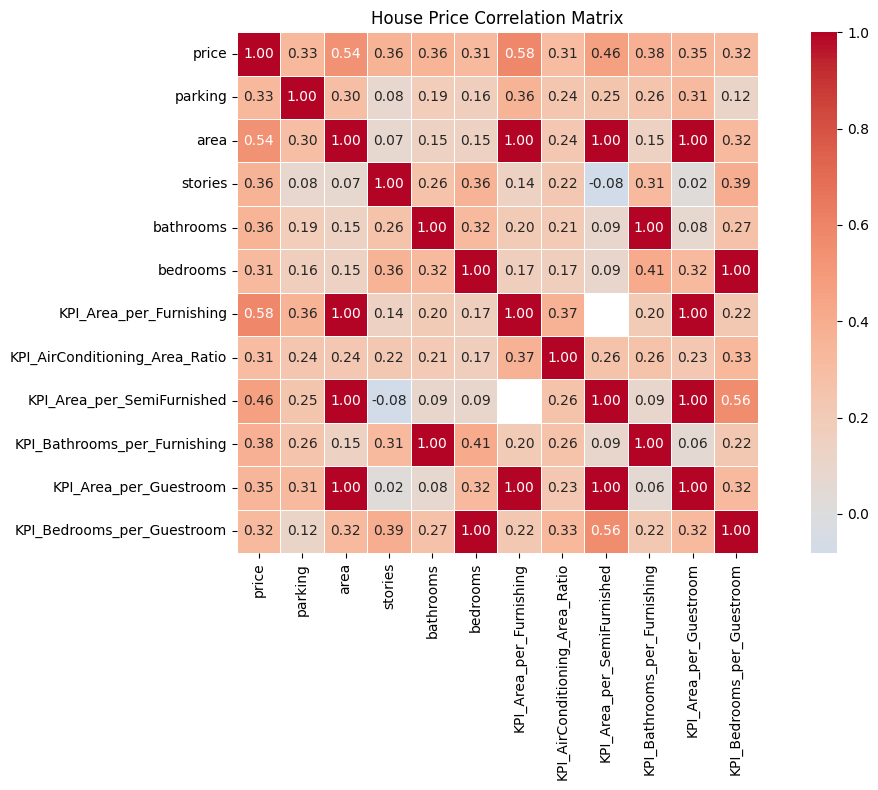


Strong correlations (|correlation| > 0.5):
price                       KPI_Area_per_Furnishing       0.584175
KPI_Area_per_Furnishing     price                         0.584175
KPI_Bedrooms_per_Guestroom  KPI_Area_per_SemiFurnished    0.557678
KPI_Area_per_SemiFurnished  KPI_Bedrooms_per_Guestroom    0.557678
price                       area                          0.536465
area                        price                         0.536465
dtype: float64


In [16]:
# Calculate correlation matrix
correlation_matrix_TOTAL = selected_data.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_TOTAL, 
            annot=True,          # Show correlation values
            cmap='coolwarm',     # Color scheme
            center=0,            # Center the colormap at 0
            fmt='.2f',           # Display 2 decimal places
            square=True,         # Make the plot square-shaped
            linewidths=0.5)      # Add gridlines

plt.title('House Price Correlation Matrix')
plt.tight_layout()
plt.show()

# Print strongest correlations (absolute value > 0.5)
print("\nStrong correlations (|correlation| > 0.5):")
strong_corr = correlation_matrix_TOTAL.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.5]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
print(strong_corr.sort_values(ascending=False))

In [17]:
# Export the dataset to a CSV file
selected_data.to_csv('post_processed_data.csv', index=False)

# Print confirmation
print(f"Dataset with selected features has been exported to 'post_processed_data.csv'.")
print(f"Removed {len(low_corr)} low correlation columns")

Dataset with selected features has been exported to 'post_processed_data.csv'.
Removed 30 low correlation columns
